In [6]:
import sys 
sys.path.append("..") 

import numpy as np
from braiding_model import BraidOperator, show_braid_words
from braiding_model import GeneratorBraid, obtain_model_braid, obtain_model_torus_knot
from braiding_model import sigma_z, sigma_x, sigma_y, sigma_0
from braiding_model import PerturbationModel

from machine_learning import Classifier, Cluster
from topology import topology_comparator, similarity_function
from functools import partial

import matplotlib.pyplot as plt

p1 = PerturbationModel()
p1.set_parameters(t1=0.1,t2=0.0)

p2 = PerturbationModel()
p2.set_parameters(t1=-0.1,t2=0.0)

p3 = PerturbationModel()
p3.set_parameters(t1=0.1,t2=0.1)

p4 = PerturbationModel()
p4.set_parameters(t1=0.0,t2=-0.1)

perturbations = [p1,p2,p3,p4]

# $\mathbb{B}_2$

In [4]:
n_band = 2
braid_operator_list = [
    BraidOperator(1), BraidOperator(1, True)
]
generator = GeneratorBraid(n_band=n_band, braid_operator_list=braid_operator_list)

models, braid_operator_list_gen = generator.get_all_combination_generate_sample(n_length=3)
print("The number of braids: ", len(braid_operator_list_gen))
for operator_list in braid_operator_list_gen[:3]:
    show_braid_words(operator_list)

The number of braids:  8


$\sigma_1$ $\sigma_1$ $\sigma_1$ 

$\sigma_1$ $\sigma_1$ $\sigma^{-1}_1$ 

$\sigma_1$ $\sigma^{-1}_1$ $\sigma_1$ 

In [5]:
#"Different" if similarity_function(model1=models[0],model2=models[1],perturbations=perturbations) == 0 else 'identical'
func = partial(similarity_function, perturbations=perturbations)
cluster = Cluster(similarity_function=func)
center_indices, group_number, groups = cluster.fit(models)
print("Centers: ", center_indices)
print("The number of samples: ", group_number)

# for operator_list in [braid_operator_list_gen[i] for i in center_indices]:
#     show_braid_words(operator_list)

/home/longyang/OSC/ml_topological_classification_knot_link/figs/../topology/topology_utils.py:20: RuntimeWarning: divide by zero encountered in log10
  return np.log10(a0)/epsilon
/home/ntu-baile/anaconda3/lib/python3.8/site-packages/scipy/optimize/_optimize.py:811: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


Centers:  [1, 3, 0, 7]
The number of samples:  [3, 3, 1, 1]


/home/longyang/OSC/ml_topological_classification_knot_link/figs/../topology/topology_utils.py:27: RuntimeWarning: divide by zero encountered in log10
  if np.log10(np.abs(v)) < c_val:


$\sigma_1$ $\sigma_1$ $\sigma^{-1}_1$ 

$\sigma_1$ $\sigma^{-1}_1$ $\sigma^{-1}_1$ 

$\sigma_1$ $\sigma_1$ $\sigma_1$ 

$\sigma^{-1}_1$ $\sigma^{-1}_1$ $\sigma^{-1}_1$ 

In [6]:
index_group = 1
for operator_list in [braid_operator_list_gen[i] for i in groups[index_group]]:
    show_braid_words(operator_list)

$\sigma_1$ $\sigma^{-1}_1$ $\sigma^{-1}_1$ 

$\sigma^{-1}_1$ $\sigma_1$ $\sigma^{-1}_1$ 

$\sigma^{-1}_1$ $\sigma^{-1}_1$ $\sigma_1$ 

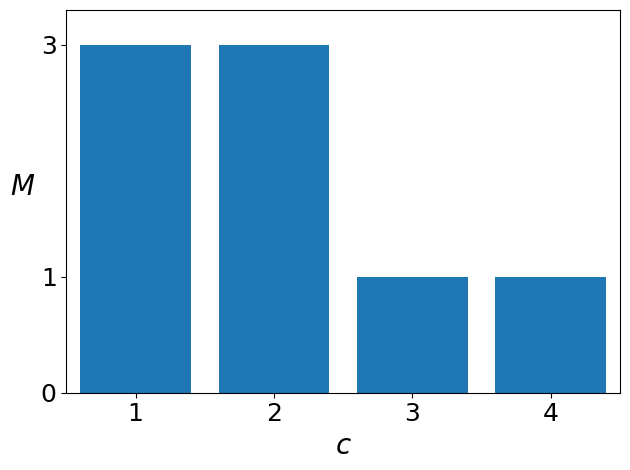

In [10]:
fig = plt.figure()
xticks = list(range(1,len(center_indices)+1))
yticks = [0, int(np.max(group_number)/2), int(np.max(group_number))]

plt.bar(np.arange(len(group_number))+1, group_number)
plt.xticks(xticks,fontsize=18)
plt.yticks(yticks,fontsize=18)

plt.xlim([0.5,len(center_indices)+0.5])
plt.ylim([0, np.max(group_number)*1.1])

plt.xlabel(r"$c$",fontsize=20)
plt.ylabel(r"$M$",fontsize=20,rotation=0,horizontalalignment='right')
plt.tight_layout()
plt.savefig("B2.svg")

# Save data

In [12]:
directory_name = 'B2'
with open('./fig2/{directory_name}/group_number.txt'.format(directory_name=directory_name),'w') as fileop: 
    fileop.write(str(group_number))

In [17]:
for i, group in enumerate(groups):
    with open('./fig2/{directory_name}/{i}.txt'.format(directory_name=directory_name, i=i),'w') as fileop: 
        for model in [models[index] for index in groups[i]]:
            fileop.write(str([(op.get_n(), op.get_is_inverse()) for op in model.get_braid_words()])+'\n')

In [19]:
for model in [models[index] for index in groups[0]]:
    show_braid_words(model.get_braid_words())

$\sigma_1$ $\sigma_1$ $\sigma^{-1}_1$ 

$\sigma_1$ $\sigma^{-1}_1$ $\sigma_1$ 

$\sigma^{-1}_1$ $\sigma_1$ $\sigma_1$ 

# load data

In [14]:
directory_name = 'B2'
index = 1
with open('./fig2/{directory_name}/{i}.txt'.format(directory_name=directory_name, i=index),'r') as fileop:
    data = fileop.readlines()
    
    
models = list()
n_band = 2
for i,_op_str in enumerate(data):
    op = eval(_op_str)
    _braid_operators = [BraidOperator(x[0],x[1]) for x in op]
    _model = obtain_model_braid(n_band, _braid_operators)
    models.append(_model)
    show_braid_words(_model.get_braid_words())
    
    _model.save_band('./fig2/{directory_name}/group_{index}_{i}.txt'.format(
        directory_name=directory_name, index=index, i=i))

$\sigma_1$ $\sigma^{-1}_1$ $\sigma^{-1}_1$ 

$\sigma^{-1}_1$ $\sigma_1$ $\sigma^{-1}_1$ 

$\sigma^{-1}_1$ $\sigma^{-1}_1$ $\sigma_1$ 

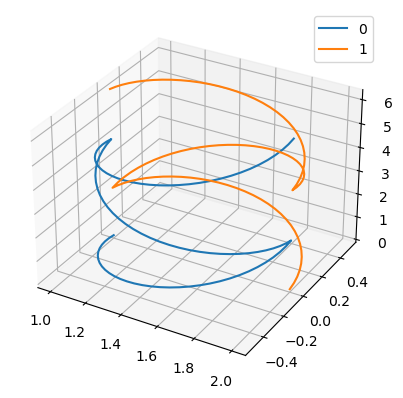

In [11]:
import matplotlib.pyplot as plt

ks = np.linspace(0, 2 * np.pi, 100)

Es = np.array([models[1].get_energies(k) for k in ks])
ax = plt.figure().add_subplot(projection='3d')
for index in range(n_band):
    x = np.real(Es[:, index])
    y = np.imag(Es[:, index])
    ax.plot(x, y, ks, label='{0}'.format(index))
    ax.legend()

plt.show()